In [202]:
import plotly.figure_factory as ff
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [203]:
# Load the loan dataset
df_loan = pd.read_csv(
    "https://raw.githubusercontent.com/wujenny214/Policy-Study-into-Grant-Assistance-for-Post-Hurricane-Rebuilding-Efforts/refs/heads/main/data/roadhome_for_datastore.csv"
)

/var/folders/xm/yhmrwng57qq9wlcywlm89pxh0000gn/T/ipykernel_79268/3311964682.py:2: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv(


In [204]:
# Load SAIPE 2004 Louisiana county-level poverty data

colspecs = [
    (0, 2),  # 1-2   FIPS State
    (3, 6),  # 4-6   FIPS County
    # (7, 15),  # 8-15  Est all ages in poverty
    # (16, 24),  # 17-24 LCI
    # (25, 33),  # 26-33 UCI
    (34, 38),  # 35-38 % all ages est
    # (39, 43),  # 40-43 % all ages LCI
    # (44, 48),  # 45-48 % all ages UCI
    # (49, 57),  # 50-57 Est age 0-17
    # (58, 66),  # 59-66 LCI
    # (67, 75),  # 68-75 UCI
    # (76, 80),  # 77-80 % 0-17 est
    # (81, 85),  # 82-85 % 0-17 LCI
    # (86, 90),  # 87-90 % 0-17 UCI
    # (91, 99),  # 92-99 Est related children 5-17 in families
    # (100, 108),  # 101-108 LCI
    # (109, 117),  # 110-117 UCI
    # (118, 122),  # 119-122 % related 5-17 est
    # (123, 127),  # 124-127 % related 5-17 LCI
    # (128, 132),  # 129-132 % related 5-17 UCI
    # (133, 139),  # 134-139 Median HH income
    # (140, 146),  # 141-146 Median HH income LCI
    # (147, 153),  # 148-153 Median HH income UCI
    # (154, 161),  # Estimate of people under age 5 in poverty
    # (162, 169),  # 90% confidence interval lower bound of estimate of people under age 5 in poverty
    # (170, 177),  # 90% confidence interval upper bound of estimate of people under age 5 in poverty
    # (178, 182),  # Estimated percent of people under age 5 in poverty
    # (183, 187),  # 90% confidence interval lower bound of estimate of percent of people under age 5 in poverty
    # (189, 192),  # 90% confidence interval upper bound of estimate of percent of people under age 5 in poverty
    (193, 238),  # State or county name
    # (239, 241),  # Two-letter Postal State abbreviation
    # (242, 266),  # A tag indicating the file name and date of creation
]

names = [
    "state_fips",
    "county_fips",
    # "all_ages_pov_est",
    # "all_ages_pov_l",
    # "all_ages_pov_u",
    "all_ages_pov_pct_est",
    # "all_ages_pov_pct_l",
    # "all_ages_pov_pct_u",
    # "age0_17_pov_est",
    # "age0_17_pov_l",
    # "age0_17_pov_u",
    # "age0_17_pov_pct_est",
    # "age0_17_pov_pct_l",
    # "age0_17_pov_pct_u",
    # "rel5_17_pov_est",
    # "rel5_17_pov_l",
    # "rel5_17_pov_u",
    # "rel5_17_pov_pct_est",
    # "rel5_17_pov_pct_l",
    # "rel5_17_pov_pct_u",
    # "med_hh_income_est",
    # "med_hh_income_l",
    # "med_hh_income_u",
    # "est_ppl_under5pov",
    # "lci_ppl_under5pov",
    # "uci_ppl_under5pov",
    # "pct_ppl_under5pov_est",
    # "pct_ppl_under5pov_l",
    # "pct_ppl_under5pov_u",
    "parish",
    # "state",
    # "file_tag",
]

# Read the fixed-width file
url = "https://www2.census.gov/programs-surveys/saipe/datasets/2004/2004-state-and-county/est04-la.txt"
df_poverty = pd.read_fwf(url, colspecs=colspecs, names=names, dtype=str)

df_poverty

,state_fips,county_fips,all_ages_pov_pct_est,parish
0,22,0,19.2,Louisiana
1,22,1,21.0,Acadia Parish
2,22,3,22.0,Allen Parish
3,22,5,12.0,Ascension Parish
4,22,7,19.3,Assumption Parish
...,...,...,...,...
60,22,119,19.0,Webster Parish
61,22,121,16.8,West Baton Rouge Parish
62,22,123,22.7,West Carroll Parish
63,22,125,20.4,West Feliciana Parish


In [205]:
# # Construct the FIPS codes directly and save them into the dataframe
# df_poverty["FIPS"] = df_poverty.apply(
#     lambda row: row["state_fips"]
#     + ("00" if len(row["county_fips"]) == 1 else "0")
#     + row["county_fips"],
#     axis=1,
# )

# (ALT method) Initialize an empty list to store the FIPS codes
fips_codes = []

# Iterate through each row in the dataframe
for i, row in df_poverty.iterrows():
    # Check the length of the county_fips and construct the FIPS code accordingly
    if len(row["county_fips"]) == 1:
        fips_code = row["state_fips"] + "00" + row["county_fips"]
    elif len(row["county_fips"]) == 2:
        fips_code = row["state_fips"] + "0" + row["county_fips"]
    else:
        fips_code = row["state_fips"] + row["county_fips"]
    fips_codes.append(fips_code)

# Add the constructed FIPS codes as a new column in the dataframe
df_poverty["FIPS"] = fips_codes

df_poverty = df_poverty[["FIPS", "parish", "all_ages_pov_pct_est"]].copy()
df_poverty = df_poverty[1:]
df_poverty

,FIPS,parish,all_ages_pov_pct_est
1,22001,Acadia Parish,21.0
2,22003,Allen Parish,22.0
3,22005,Ascension Parish,12.0
4,22007,Assumption Parish,19.3
5,22009,Avoyelles Parish,24.8
...,...,...,...
60,22119,Webster Parish,19.0
61,22121,West Baton Rouge Parish,16.8
62,22123,West Carroll Parish,22.7
63,22125,West Feliciana Parish,20.4


,GEOID,STATEFP,COUNTYFP,NAME,geometry
103,22061,22,061,Lincoln,"POLYGON ((-92.88093 32.58526, -92.86661 32.607..."
392,22095,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476..."
409,22029,22,029,Concordia,"POLYGON ((-91.8633 31.35445, -91.84502 31.3759..."
570,22003,22,003,Allen,"POLYGON ((-93.13119 30.51828, -93.13081 30.564..."
628,22093,22,093,St. James,"POLYGON ((-90.96374 30.06683, -90.93559 30.085..."
...,...,...,...,...,...
3095,22083,22,083,Richland,"POLYGON ((-92.03117 32.2814, -92.01982 32.2976..."
3118,22037,22,037,East Feliciana,"POLYGON ((-91.32071 30.69942, -91.2931 30.7155..."
3126,22051,22,051,Jefferson,"POLYGON ((-90.28006 29.99171, -90.27986 29.998..."
3153,22049,22,049,Jackson,"POLYGON ((-92.81715 32.1617, -92.79882 32.1813..."


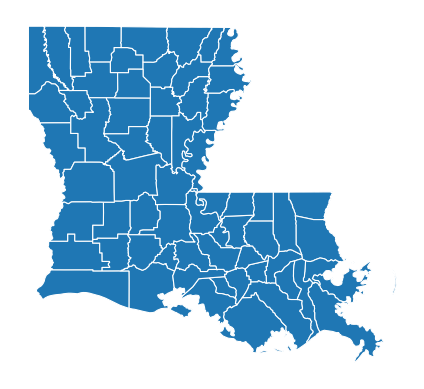

In [206]:
# Download all US counties (2023, 1:5m cartographic boundaries) from Census
url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_county_5m.zip"
counties = gpd.read_file(url)

# Keep only Louisiana (STATEFP = '22')
la = counties[counties["STATEFP"] == "22"].copy()

# Keep useful fields; GEOID is the full 5-digit county/parish FIPS
la = la[["GEOID", "STATEFP", "COUNTYFP", "NAME", "geometry"]]

# Save as GeoJSON (Leaflet/Mapbox/Folium/Plotly-ready)
la.to_file("louisiana_counties_fips.geojson", driver="GeoJSON")

# Mapping Louisiana parishes
ax = la.plot(edgecolor="white", linewidth=0.8)
ax.set_axis_off()

la

In [207]:
# Concatenate the la dataframe with the df_poverty dataframe to include the geometry variable
df_poverty_with_geometry = pd.concat(
    [df_poverty.set_index("FIPS"), la.set_index("GEOID")[["geometry"]]],
    axis=1,
    join="inner",
).reset_index()

df_poverty_with_geometry

,index,parish,all_ages_pov_pct_est,geometry
0,22001,Acadia Parish,21.0,"POLYGON ((-92.63216 30.31429, -92.6195 30.3400..."
1,22003,Allen Parish,22.0,"POLYGON ((-93.13119 30.51828, -93.13081 30.564..."
2,22005,Ascension Parish,12.0,"POLYGON ((-91.10656 30.10852, -91.08983 30.108..."
3,22007,Assumption Parish,19.3,"POLYGON ((-91.25894 30.00067, -91.23635 30.000..."
4,22009,Avoyelles Parish,24.8,"POLYGON ((-92.28074 30.96507, -92.2086 30.9621..."
...,...,...,...,...
59,22119,Webster Parish,19.0,"POLYGON ((-93.51632 33.00254, -93.52099 33.018..."
60,22121,West Baton Rouge Parish,16.8,"POLYGON ((-91.48173 30.51103, -91.41482 30.511..."
61,22123,West Carroll Parish,22.7,"POLYGON ((-91.63888 32.70247, -91.61772 32.720..."
62,22125,West Feliciana Parish,20.4,"MULTIPOLYGON (((-91.66251 30.97036, -91.64877 ..."


In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# Create bins manually
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–40%", "40–50%", "50%+"]

# Ensure the column is numeric before applying pd.cut
df_poverty_with_geometry["all_ages_pov_pct_est"] = pd.to_numeric(
    df_poverty_with_geometry["all_ages_pov_pct_est"], errors="coerce"
)

df_poverty_with_geometry["pov_bin"] = pd.cut(
    df_poverty_with_geometry["all_ages_pov_pct_est"],
    bins=bins,
    labels=labels,
    include_lowest=True,
)
df_poverty_with_geometry = gpd.GeoDataFrame(
    df_poverty_with_geometry, geometry="geometry", crs="EPSG:4269"
)

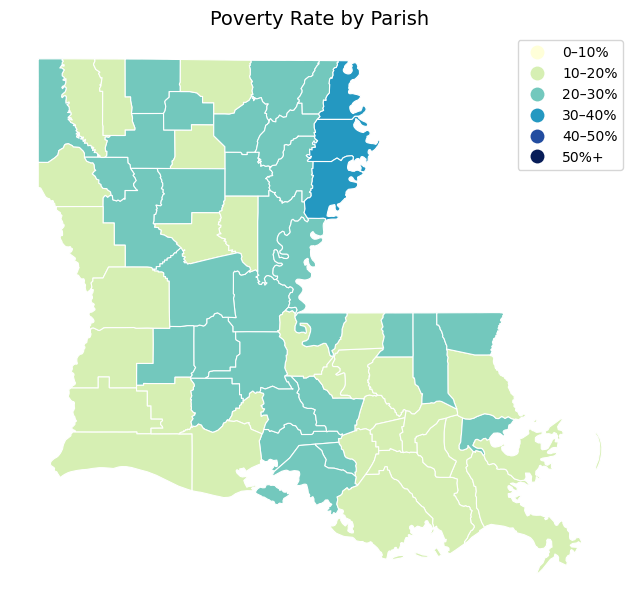

In [209]:
# Plot with grey for missing
fig, ax = plt.subplots(figsize=(8, 8))
df_poverty_with_geometry.plot(
    column="pov_bin",
    cmap="YlGnBu",
    linewidth=0.8,
    edgecolor="white",
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data",
    },
)
ax.set_title("Poverty Rate by Parish", fontsize=14)
ax.axis("off")
plt.show()

In [210]:
# To get accurate figures for the net grant amounts, the  difference between “current” (Current Total DOB Amount) and “closing” (Closing Total DOB Amount) DOB must
# be subtracted from the sum of the compensation and additional compensation grants (TOTAL_CLOSING_AMOUNT).

# Difference between “current” (Current Total DOB Amount) and “closing” (Closing Total DOB Amount) DOB
df_loan["delta"] = (
    df_loan["Current Total DOB Amount (no Legal Fees removed)"]
    - df_loan["Closing Total DOB Amount"]
)

# Calculate gross average loan amount
df_loan["gross_loan_amount"] = df_loan["TOTAL_CLOSING_AMOUNT"] - df_loan["delta"]

df_loan.head()

,Unnamed: 0,Structure Type,GIS City,GIS State,GIS Zip,PARISH,Closing Option,TOTAL_CLOSING_AMOUNT,Total CG Amount,Total ACG Amunt,...,PSV at Closing,"Closed file - PSV Option 1 With No ACG -excluding Sold Home, Inelig, Deceased and files closed with RHEI & IMM only -23,912","Closed File - Option 2/3, Sold Home, Ineligible, Deceased, and Closed with RHEI and IMM Only",Closed with Approved Unmet Needs (Y/N),Applicant With Current Insurance (Private and/or Flood) Y/N,Closing Total DOB Amount,Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC,ARS File (Yes/No),delta,gross_loan_amount
0,9613.0,Single (including mobile home),METAIRIE,LA,70001,Jefferson,1.0,150000.00,95213.27,39036.73,...,172000.0,N,N,N,N,3772.04,-88818.13,N,0.0,150000.00
1,21349.0,Duplex (with one owner-occupied unit),METAIRIE,LA,70001,Jefferson,2.0,150000.00,150000.00,0.00,...,250000.0,N,Y,N,Y,57512.26,-250000.00,N,625.0,149375.00
2,25325.0,Duplex (with one owner-occupied unit),METAIRIE,LA,70001,Jefferson,1.0,3450.14,3450.14,0.00,...,240000.0,N,Y,N,Y,29741.00,-206808.86,N,0.0,3450.14
3,27236.0,Duplex (with one owner-occupied unit),METAIRIE,LA,70001,Jefferson,1.0,10665.59,10665.59,0.00,...,136000.0,N,N,N,Y,4824.55,-120509.86,N,0.0,10665.59
4,36177.0,Single (including mobile home),METAIRIE,LA,70001,Jefferson,1.0,131947.98,101947.98,0.00,...,345000.0,N,N,N,Y,75005.62,-345000.00,N,1166.4,130781.58


In [211]:
# Ensure both columns have the same data type before merging
la["GEOID"] = la["GEOID"].astype(float)

# Merge loan data with geodataframe
df_loan_merged = la.merge(df_loan, left_on="GEOID", right_on="FIPS", how="left")
df_loan_merged.head()

,GEOID,STATEFP,COUNTYFP,NAME,geometry,Unnamed: 0,Structure Type,GIS City,GIS State,GIS Zip,...,PSV at Closing,"Closed file - PSV Option 1 With No ACG -excluding Sold Home, Inelig, Deceased and files closed with RHEI & IMM only -23,912","Closed File - Option 2/3, Sold Home, Ineligible, Deceased, and Closed with RHEI and IMM Only",Closed with Approved Unmet Needs (Y/N),Applicant With Current Insurance (Private and/or Flood) Y/N,Closing Total DOB Amount,Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC,ARS File (Yes/No),delta,gross_loan_amount
0,22061.0,22,061,Lincoln,"POLYGON ((-92.88093 32.58526, -92.86661 32.607...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22095.0,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476...",25172.0,Single (including mobile home),EDGARD,LA,70049,...,35000.00,N,N,N,N,4722.53,-35000.00,N,0.0,150000.00
2,22095.0,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476...",63448.0,Mobile Home on Leased Land,EDGARD,LA,70049,...,13698.99,N,N,N,N,3783.24,-13698.99,N,0.0,26666.76
3,22095.0,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476...",74986.0,Mobile Home on Leased Land,WALLACE,LA,70049,...,7772.46,N,N,N,N,2325.80,-7772.46,N,0.0,31554.20
4,22095.0,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476...",76398.0,Mobile Home,EDGARD,LA,70049,...,47857.94,N,N,N,N,0.00,-47857.94,N,0.0,31559.00


In [212]:
df_loan_merged_avg = (
    df_loan_merged.groupby(["GEOID", "NAME"], dropna=False)["gross_loan_amount"]
    .mean()
    .reset_index()
)
df_loan_merged_avg

,GEOID,NAME,gross_loan_amount
0,22001.0,Acadia,40252.706105
1,22003.0,Allen,36200.722139
2,22005.0,Ascension,48162.917083
3,22007.0,Assumption,35578.086636
4,22009.0,Avoyelles,NaN
...,...,...,...
59,22119.0,Webster,NaN
60,22121.0,West Baton Rouge,55194.633846
61,22123.0,West Carroll,NaN
62,22125.0,West Feliciana,59033.690000


In [213]:
# merge average loan amounts back to geodataframe
df_loan_geo = la.merge(
    df_loan_merged_avg, left_on="GEOID", right_on="GEOID", how="left"
)

df_loan_geo = gpd.GeoDataFrame(df_loan_geo, geometry="geometry", crs="EPSG:4326")
df_loan_geo

,GEOID,STATEFP,COUNTYFP,NAME_x,geometry,NAME_y,gross_loan_amount
0,22061.0,22,061,Lincoln,"POLYGON ((-92.88093 32.58526, -92.86661 32.607...",Lincoln,NaN
1,22095.0,22,095,St. John the Baptist,"POLYGON ((-90.68727 30.0372, -90.66997 30.0476...",St. John the Baptist,28915.677805
2,22029.0,22,029,Concordia,"POLYGON ((-91.8633 31.35445, -91.84502 31.3759...",Concordia,NaN
3,22003.0,22,003,Allen,"POLYGON ((-93.13119 30.51828, -93.13081 30.564...",Allen,36200.722139
4,22093.0,22,093,St. James,"POLYGON ((-90.96374 30.06683, -90.93559 30.085...",St. James,36174.494329
...,...,...,...,...,...,...,...
59,22083.0,22,083,Richland,"POLYGON ((-92.03117 32.2814, -92.01982 32.2976...",Richland,NaN
60,22037.0,22,037,East Feliciana,"POLYGON ((-91.32071 30.69942, -91.2931 30.7155...",East Feliciana,35249.400357
61,22051.0,22,051,Jefferson,"POLYGON ((-90.28006 29.99171, -90.27986 29.998...",Jefferson,55248.651926
62,22049.0,22,049,Jackson,"POLYGON ((-92.81715 32.1617, -92.79882 32.1813...",Jackson,NaN


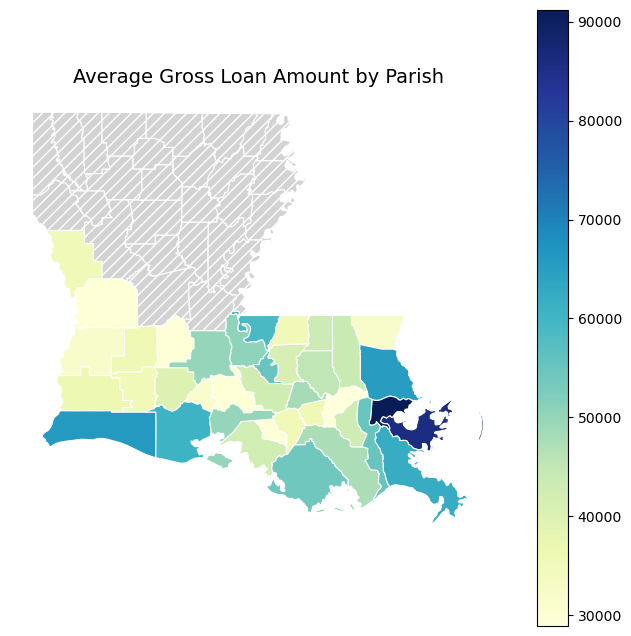

In [214]:
# Plot with grey for missing
fig, ax = plt.subplots(figsize=(8, 8))
df_loan_geo.plot(
    column="gross_loan_amount",
    cmap="YlGnBu",
    linewidth=0.8,
    edgecolor="white",
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data",
    },
)
ax.set_title("Average Gross Loan Amount by Parish", fontsize=14)
ax.axis("off")
plt.show()

Text(0.5, 1.0, 'Average Gross Loan Amount by Parish')

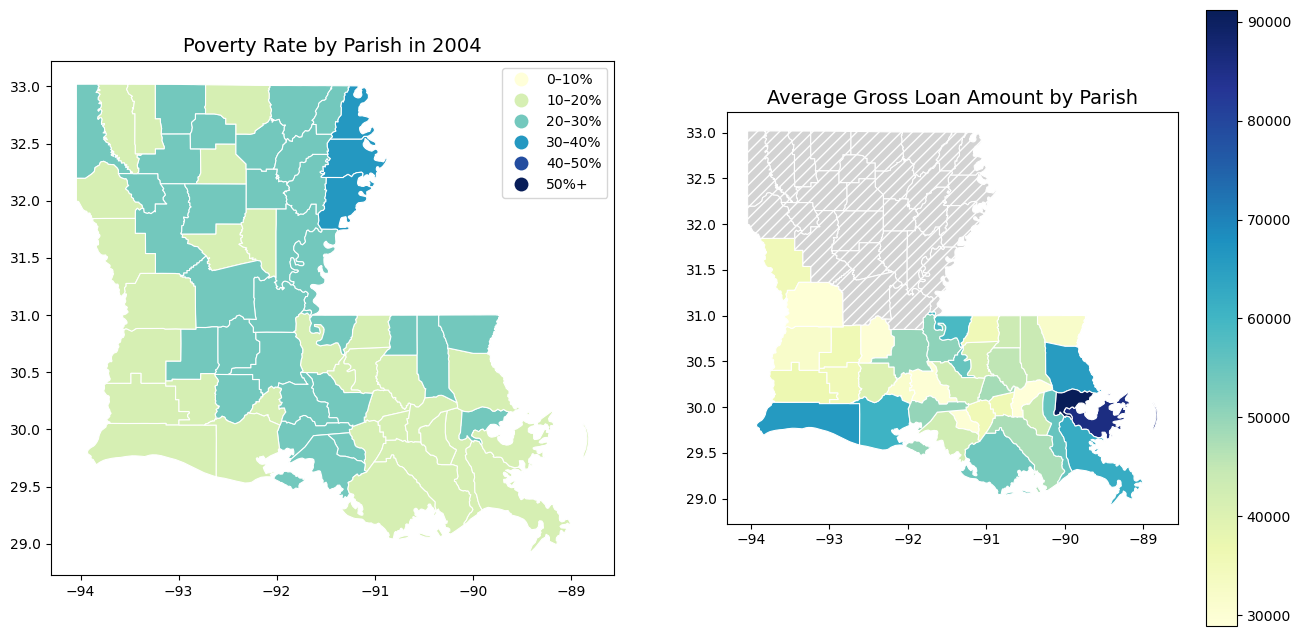

In [215]:
# plotting Poverty Rate by Parish in 2004 next to Average Gross Loan Amount by Parish
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
df_poverty_with_geometry.plot(
    column="pov_bin",
    cmap="YlGnBu",
    linewidth=0.8,
    edgecolor="white",
    legend=True,
    ax=ax1,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data",
    },
)
ax1.set_title("Poverty Rate by Parish in 2004", fontsize=14)

df_loan_geo.plot(
    column="gross_loan_amount",
    cmap="YlGnBu",
    linewidth=0.8,
    edgecolor="white",
    legend=True,
    ax=ax2,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data",
    },
)
ax2.set_title("Average Gross Loan Amount by Parish", fontsize=14)

In [216]:
# Ensure both columns have the same data type before merging
df_poverty_with_geometry["index"] = df_poverty_with_geometry["index"].astype(int)

# Merge df_loan_geo and df_poverty_with_geometry on GEOID to create a combined dataframe
df_combined = df_loan_geo.merge(
    df_poverty_with_geometry[["index", "pov_bin", "all_ages_pov_pct_est"]],
    left_on="GEOID",
    right_on="index",
    how="right",
)
df_combined

,GEOID,STATEFP,COUNTYFP,NAME_x,geometry,NAME_y,gross_loan_amount,index,pov_bin,all_ages_pov_pct_est
0,22001.0,22,001,Acadia,"POLYGON ((-92.63216 30.31429, -92.6195 30.3400...",Acadia,40252.706105,22001,20–30%,21.0
1,22003.0,22,003,Allen,"POLYGON ((-93.13119 30.51828, -93.13081 30.564...",Allen,36200.722139,22003,20–30%,22.0
2,22005.0,22,005,Ascension,"POLYGON ((-91.10656 30.10852, -91.08983 30.108...",Ascension,48162.917083,22005,10–20%,12.0
3,22007.0,22,007,Assumption,"POLYGON ((-91.25894 30.00067, -91.23635 30.000...",Assumption,35578.086636,22007,10–20%,19.3
4,22009.0,22,009,Avoyelles,"POLYGON ((-92.28074 30.96507, -92.2086 30.9621...",Avoyelles,NaN,22009,20–30%,24.8
...,...,...,...,...,...,...,...,...,...,...
59,22119.0,22,119,Webster,"POLYGON ((-93.51632 33.00254, -93.52099 33.018...",Webster,NaN,22119,10–20%,19.0
60,22121.0,22,121,West Baton Rouge,"POLYGON ((-91.48173 30.51103, -91.41482 30.511...",West Baton Rouge,55194.633846,22121,10–20%,16.8
61,22123.0,22,123,West Carroll,"POLYGON ((-91.63888 32.70247, -91.61772 32.720...",West Carroll,NaN,22123,20–30%,22.7
62,22125.0,22,125,West Feliciana,"MULTIPOLYGON (((-91.66251 30.97036, -91.64877 ...",West Feliciana,59033.690000,22125,20–30%,20.4


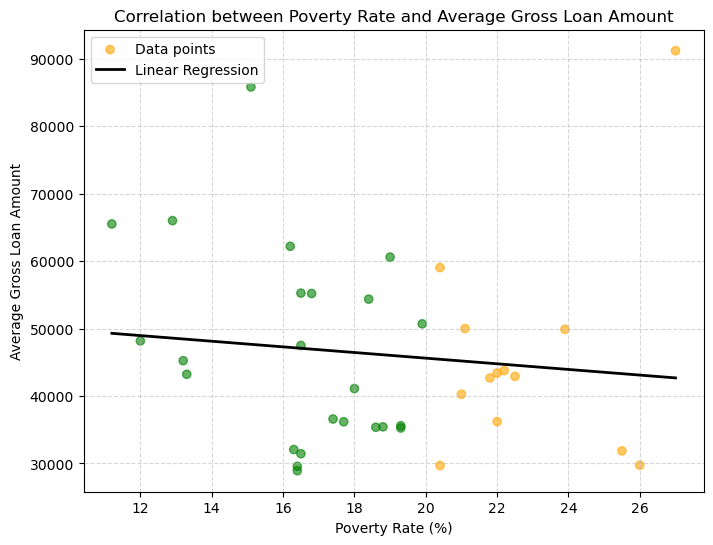

Slope: -418.3677
Intercept: 53971.5903


In [222]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Map the 'pov_bin' column to colors for the scatter plot
colors = df_combined["pov_bin"].map(
    {
        "0–10%": "blue",
        "10–20%": "green",
        "20–30%": "orange",
        "30–40%": "red",
        "40–50%": "purple",
        "50%+": "brown",
    }
)

# Drop rows with NaNs in relevant columns
df_clean = df_combined.dropna(
    subset=["all_ages_pov_pct_est", "gross_loan_amount"]
).copy()

# Extract x and y values
x = df_clean["all_ages_pov_pct_est"].values.reshape(-1, 1)
y = df_clean["gross_loan_amount"].values

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values for the regression line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    df_clean["all_ages_pov_pct_est"],
    df_clean["gross_loan_amount"],
    c=df_clean["pov_bin"].map(
        {
            "0–10%": "blue",
            "10–20%": "green",
            "20–30%": "orange",
            "30–40%": "red",
            "40–50%": "purple",
            "50%+": "brown",
        }
    ),
    alpha=0.6,
    label="Data points",
)

# Plot the regression line
plt.plot(x_range, y_pred, color="black", linewidth=2, label="Linear Regression")

# Add labels and title
plt.title("Correlation between Poverty Rate and Average Gross Loan Amount")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Average Gross Loan Amount")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Optional: print regression stats
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")